# Some examples plotting in 3D #
addapted from https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html


In [2]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

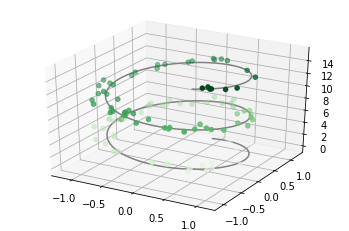

In [4]:
# 3D plotting of stuff
fig = plt.figure()
ax = plt.axes(projection='3d')


# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

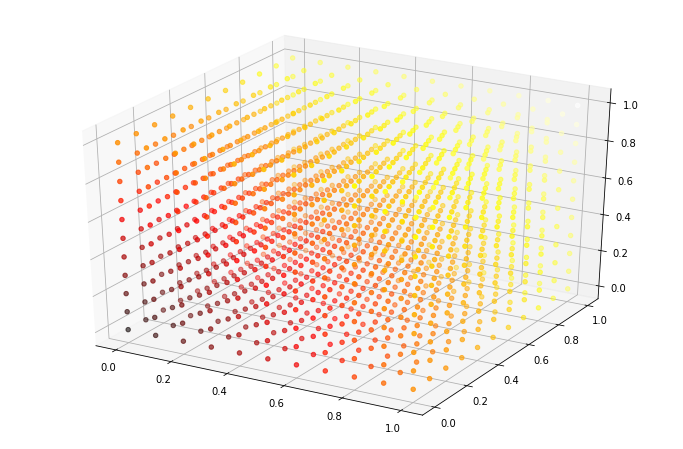

In [15]:
# 3D plotting of stuff
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')


# Data for three-dimensional scattered points
Npts=11
Dlst=np.linspace(0,1,Npts)

grid=np.zeros((4,Npts*Npts*Npts))
cnt=0
for x in range(Npts):
    for y in range(Npts):
        for z in range(Npts):
            grid[0,cnt]=Dlst[x]
            grid[1,cnt]=Dlst[y]
            grid[2,cnt]=Dlst[z]
            grid[3,cnt]=np.sqrt(Dlst[x]**2+Dlst[y]**2+Dlst[z]**2)
            
            cnt+=1
            

ax.scatter3D(grid[0,:], grid[1,:], grid[2,:], c=grid[3,:], cmap='hot');

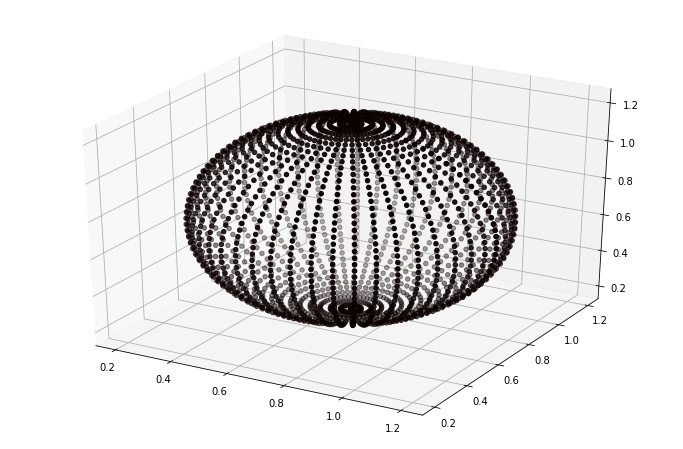

In [14]:
# 3D plotting of stuff
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')


# Data for three-dimensional scattered points
Npts=50
ThetaL=np.linspace(0,np.pi,Npts)
PhiL=np.linspace(0,np.pi*2,Npts)


grid=np.zeros((4,Npts*Npts))
cnt=0

R=0.5
C=0.7
for x in range(Npts):
    for y in range(Npts):
        grid[0,cnt]=C+R*np.sin(ThetaL[x])*np.cos(PhiL[y])
        grid[1,cnt]=C+R*np.sin(ThetaL[x])*np.sin(PhiL[y])
        grid[2,cnt]=C+R*np.cos(ThetaL[x])
        grid[3,cnt]=5
            
        cnt+=1
            
ax.scatter3D(grid[0,:], grid[1,:], grid[2,:], c=grid[3,:], cmap='hot');

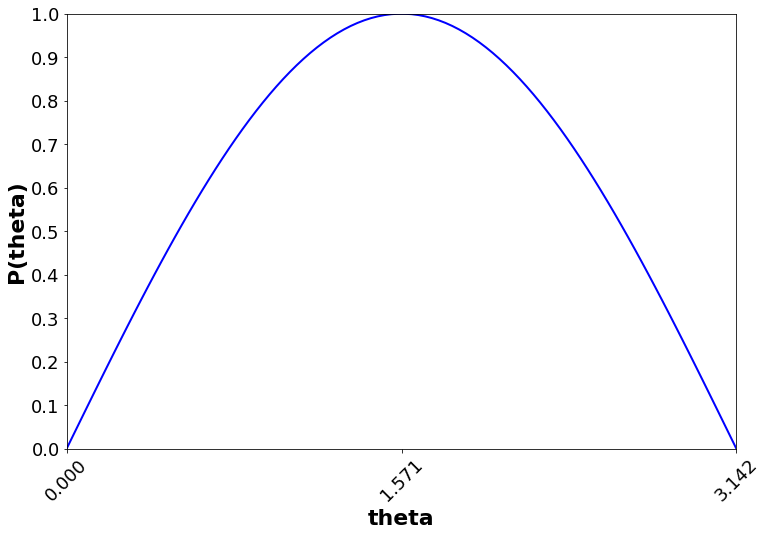

In [19]:
Xcoord=np.linspace(0,np.pi,100)
Ycoord=np.sin(Xcoord)
#En dit nu mooi plotten
plt.figure(figsize=(12,8))
#for yPred in all_yPred:
#    plt.plot(xPred, yPred,   color='red'  ,linewidth=1, zorder=-1, alpha=0.25)

#plt.fill_between(xPred.ravel(), CIlow, CIhigh, color='blue', zorder=0, alpha=.5)
plt.plot(Xcoord, Ycoord,  color='blue',linewidth=2, zorder=0)
#plt.scatter(Xcoord, Ycoord,  color='black', zorder=1)

plt.axis([0,np.pi,0,1])
Xlst=np.linspace(0,np.pi,3)
plt.xticks(Xlst,rotation=45,fontsize=18)
Ylst=np.linspace(0,1,11)
plt.yticks(Ylst,fontsize=18)
plt.xlabel("theta",fontsize=22,fontweight="bold")
plt.ylabel("P(theta)",fontsize=22,fontweight="bold")

plt.show()

Animated 3D plots:
https://stackoverflow.com/questions/25333732/matplotlib-animation-not-working-in-ipython-notebook-blank-plot (info on how to get the animation working)
https://eli.thegreenplace.net/2016/drawing-animated-gifs-with-matplotlib/ (2D example)
https://matplotlib.org/3.1.1/gallery/animation/random_walk.html (3D RW)

<IPython.core.display.Javascript object>


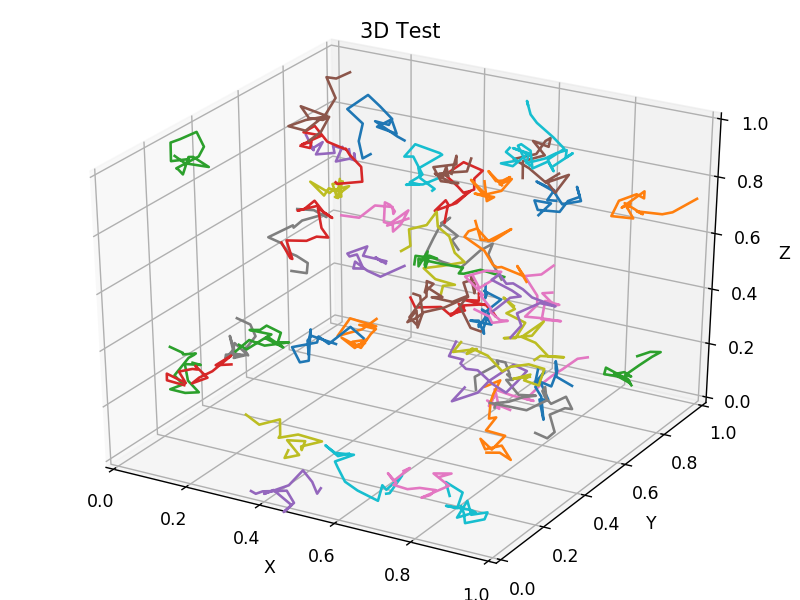

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
%matplotlib notebook
# Fixing random state for reproducibility
np.random.seed(19680801)


def Gen_RandLine(length, dims=2):
    """
    Create a line using a random walk algorithm

    length is the number of points for the line.
    dims is the number of dimensions the line has.
    """
    lineData = np.empty((dims, length))
    lineData[:, 0] = np.random.rand(dims)
    for index in range(1, length):
        # scaling the random numbers by 0.1 so
        # movement is small compared to position.
        # subtraction by 0.5 is to change the range to [-0.5, 0.5]
        # to allow a line to move backwards.
        step = ((np.random.rand(dims) - 0.5) * 0.1)
        lineData[:, index] = lineData[:, index - 1] + step

    return lineData


def update_lines(num, dataLines, lines):
    for line, data in zip(lines, dataLines):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
    return lines

# Attaching 3D axis to the figure
fig = plt.figure()
ax = p3.Axes3D(fig)

# Fifty lines of random 3-D lines
data = [Gen_RandLine(25, 3) for index in range(50)]

# Creating fifty line objects.
# NOTE: Can't pass empty arrays into 3d version of plot()
lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1])[0] for dat in data]

# Setting the axes properties
ax.set_xlim3d([0.0, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([0.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 1.0])
ax.set_zlabel('Z')

ax.set_title('3D Test')

# Creating the Animation object
line_ani = animation.FuncAnimation(fig, update_lines, 25, fargs=(data, lines),
                                   interval=50, blit=False)

plt.show()